# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing & feature selection

# from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# cross validation
from sklearn.model_selection import train_test_split

# parameter tuning
from sklearn.model_selection import GridSearchCV

# Import Dataset

In [2]:
orig = pd.read_csv('existingproductattributes2017.csv', header =0)

In [3]:
# create a working copy of the data
rawData = orig.copy()

# Pre-Process Dataset

In [4]:
rawData.head()

,ProductType,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
0,PC,101,949.00,3,3,2,0,0,2,0,0.9,1967.0,25.8,23.94,6.62,16.89,0.15,12
1,PC,102,2249.99,2,1,0,0,0,1,0,0.9,4806.0,50.0,35.00,31.75,19.00,0.25,8
2,PC,103,399.00,3,0,0,0,0,1,0,0.9,12076.0,17.4,10.50,8.30,10.20,0.08,12
3,Laptop,104,409.99,49,19,8,3,9,7,8,0.8,109.0,5.7,15.00,9.90,1.30,0.08,196
4,Laptop,105,1079.99,58,31,11,7,36,7,20,0.7,268.0,7.0,12.90,0.30,8.90,0.09,232


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
ProductType              80 non-null object
ProductNum               80 non-null int64
Price                    80 non-null float64
x5StarReviews            80 non-null int64
x4StarReviews            80 non-null int64
x3StarReviews            80 non-null int64
x2StarReviews            80 non-null int64
x1StarReviews            80 non-null int64
PositiveServiceReview    80 non-null int64
NegativeServiceReview    80 non-null int64
Recommendproduct         80 non-null float64
BestSellersRank          65 non-null float64
ShippingWeight           80 non-null float64
ProductDepth             80 non-null float64
ProductWidth             80 non-null float64
ProductHeight            80 non-null float64
ProfitMargin             80 non-null float64
Volume                   80 non-null int64
dtypes: float64(8), int64(9), object(1)
memory usage: 11.3+ KB


In [6]:
rawData.describe()

,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,65.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,142.550000,247.251125,176.250000,40.200000,14.787500,13.787500,37.675000,51.750000,6.225000,0.745000,1126.307692,9.668125,14.425250,7.819000,6.258625,0.15450,705.000000
std,26.732572,339.574925,379.193698,70.741891,30.963717,45.924455,186.718483,104.471606,14.304974,0.197388,3261.130095,15.207573,34.930846,6.814665,6.888852,0.11639,1516.774793
min,101.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.010000,0.000000,0.000000,0.000000,0.05000,0.000000
25%,120.750000,52.665000,10.000000,2.750000,2.000000,1.000000,2.000000,2.000000,1.000000,0.700000,7.000000,0.512500,4.775000,1.750000,0.400000,0.05000,40.000000
50%,140.500000,132.720000,50.000000,22.000000,7.000000,3.000000,8.500000,5.500000,3.000000,0.800000,27.000000,2.100000,7.950000,6.800000,3.950000,0.12000,200.000000
75%,160.250000,352.490000,306.500000,33.000000,11.250000,7.000000,15.250000,42.000000,6.250000,0.900000,281.000000,11.205000,15.025000,11.275000,10.300000,0.20000,1226.000000
max,200.000000,2249.990000,2801.000000,431.000000,162.000000,370.000000,1654.000000,536.000000,112.000000,1.000000,17502.000000,63.000000,300.000000,31.750000,25.800000,0.40000,11204.000000


In [7]:
rawData.isnull().sum().sum()

15

In [8]:
rawData.isna().any()

ProductType              False
ProductNum               False
Price                    False
x5StarReviews            False
x4StarReviews            False
x3StarReviews            False
x2StarReviews            False
x1StarReviews            False
PositiveServiceReview    False
NegativeServiceReview    False
Recommendproduct         False
BestSellersRank           True
ShippingWeight           False
ProductDepth             False
ProductWidth             False
ProductHeight            False
ProfitMargin             False
Volume                   False
dtype: bool

In [9]:
# remove column with NA values
rawData.drop('BestSellersRank', axis=1, inplace=True)

In [10]:
# # Remove ProductNum as it is a unique identifier and does not contribute to modeling.
rawData.drop('ProductNum', axis=1, inplace=True)

In [11]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
ProductType              80 non-null object
Price                    80 non-null float64
x5StarReviews            80 non-null int64
x4StarReviews            80 non-null int64
x3StarReviews            80 non-null int64
x2StarReviews            80 non-null int64
x1StarReviews            80 non-null int64
PositiveServiceReview    80 non-null int64
NegativeServiceReview    80 non-null int64
Recommendproduct         80 non-null float64
ShippingWeight           80 non-null float64
ProductDepth             80 non-null float64
ProductWidth             80 non-null float64
ProductHeight            80 non-null float64
ProfitMargin             80 non-null float64
Volume                   80 non-null int64
dtypes: float64(7), int64(8), object(1)
memory usage: 10.1+ KB


# Select Features & Dependent Variable

In [12]:
X = rawData.iloc[:,0:15]

In [13]:
X.head()

,ProductType,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin
0,PC,949.00,3,3,2,0,0,2,0,0.9,25.8,23.94,6.62,16.89,0.15
1,PC,2249.99,2,1,0,0,0,1,0,0.9,50.0,35.00,31.75,19.00,0.25
2,PC,399.00,3,0,0,0,0,1,0,0.9,17.4,10.50,8.30,10.20,0.08
3,Laptop,409.99,49,19,8,3,9,7,8,0.8,5.7,15.00,9.90,1.30,0.08
4,Laptop,1079.99,58,31,11,7,36,7,20,0.7,7.0,12.90,0.30,8.90,0.09


In [14]:
corrMat = X.corr().abs()

In [15]:
# Select upper triangle of correlation matrix
upper = corrMat.where(np.triu(np.ones(corrMat.shape), k=1).astype(np.bool))

In [16]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [17]:
to_drop

['x3StarReviews', 'x1StarReviews']

In [18]:
X.drop(X[to_drop], axis=1, inplace=True)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
ProductType              80 non-null object
Price                    80 non-null float64
x5StarReviews            80 non-null int64
x4StarReviews            80 non-null int64
x2StarReviews            80 non-null int64
PositiveServiceReview    80 non-null int64
NegativeServiceReview    80 non-null int64
Recommendproduct         80 non-null float64
ShippingWeight           80 non-null float64
ProductDepth             80 non-null float64
ProductWidth             80 non-null float64
ProductHeight            80 non-null float64
ProfitMargin             80 non-null float64
dtypes: float64(7), int64(5), object(1)
memory usage: 8.2+ KB


In [20]:
y = rawData['Volume']

In [21]:
# Convert Product Type to numeric value
le = LabelEncoder()
le.fit(X['ProductType'])
X['ProductType'] = le.transform(X['ProductType'])

In [22]:
cat_columns = ['ProductType']
cat_columns_idx = [X.columns.get_loc(col) 
                   for col in cat_columns]
ohe = OneHotEncoder(categorical_features=cat_columns_idx, 
                    sparse=False, handle_unknown="ignore")
X_ohe = ohe.fit_transform(X)

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [23]:
X_ohe.shape

(80, 24)

# Establish X / y train & test sets

In [24]:
# Original Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .25, random_state  =  123)

In [25]:
# One Hot Encoded Dataset
X_ohe_train, X_ohe_test, y_train, y_test = train_test_split(
    X_ohe, y, test_size = .25, random_state  =  123)

# Model

## Random Forest

In [26]:
# check Random Forest base performance
rf = RandomForestRegressor(n_estimators=150)
score_rf0 = cross_val_score(rf, X_train, y_train, cv=10)
print("RF - original dataset: %0.8f" % score_rf0.mean())
score_rf1 = cross_val_score(rf, X_ohe_train, y_train, cv=10)
print("RF - OHE dataset: %0.8f" % score_rf1.mean())

RF - original dataset: 0.85057908
RF - OHE dataset: 0.85020923


In [27]:
rf_param_grid = { 
    'n_estimators': [1, 50, 100, 150, 200, 250, 300]
}
CV_rf0 = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                      n_jobs=-1, cv=10)
CV_rf1 = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                      n_jobs=-1, cv=10)

In [28]:
# check best paramters on original dataset
CV_rf0.fit(X_train, y_train)
print("Best score - original dataset: %0.8f" % CV_rf0.best_score_)
print("Best parameters set - original dataset:")
print(CV_rf0.best_params_)

Best score - original dataset: 0.85018212
Best parameters set - original dataset:
{'n_estimators': 150}


In [29]:
# check best paramters on original dataset
CV_rf1.fit(X_train, y_train)
print("Best score - original dataset: %0.8f" % CV_rf1.best_score_)
print("Best parameters set - original dataset:")
print(CV_rf1.best_params_)

Best score - original dataset: 0.86765220
Best parameters set - original dataset:
{'n_estimators': 150}


## Gradient Boosting

In [30]:
# check Random Forest base performance
gb = GradientBoostingRegressor(n_estimators=10)
score_gb0 = cross_val_score(gb, X_train, y_train, cv=10)
print("Gradient Boosting - original dataset: %0.8f" % score_gb0.mean())
score_gb1 = cross_val_score(gb, X_ohe_train, y_train, cv=10)
print("Gradient Boosting - OHE dataset: %0.8f" % score_gb1.mean())

Gradient Boosting - original dataset: -0.83119095
Gradient Boosting - OHE dataset: -0.84681927


In [31]:
# Set Up Parameter Tuning
gb_param_grid = { 
    'n_estimators': [50, 100, 150, 200, 250, 300]
}
CV_gb0 = GridSearchCV(estimator=gb, param_grid=gb_param_grid, 
                      n_jobs=-1, cv=10)
CV_gb1 = GridSearchCV(estimator=gb, param_grid=gb_param_grid, 
                      n_jobs=-1, cv=10)

In [32]:
# check best paramters on original dataset
CV_gb0.fit(X_train, y_train)
print("Best score - original dataset: %0.8f" % CV_gb0.best_score_)
print("Best parameters set - original dataset:")
print(CV_gb0.best_params_)

Best score - original dataset: 0.86105224
Best parameters set - original dataset:
{'n_estimators': 250}


In [33]:
# check best paramters on OHE dataset
CV_gb1.fit(X_ohe_train, y_train)
print("Best score - OHE dataset: %0.8f" % CV_gb1.best_score_)
print("Best parameters set - OHE dataset:")
print(CV_gb1.best_params_)

Best score - OHE dataset: 0.89551302
Best parameters set - OHE dataset:
{'n_estimators': 300}


## SVM

In [34]:
# check Random Forest base performance
svr = SVR(gamma='auto')
score_svr0 = cross_val_score(svr, X_train, y_train, cv=10)
print("SVM - original dataset: %0.8f" % score_svr0.mean())
score_svr1 = cross_val_score(svr, X_ohe_train, y_train, cv=10)
print("SVM - OHE dataset: %0.8f" % score_svr1.mean())

SVM - original dataset: -1.70038219
SVM - OHE dataset: -1.69991228


In [35]:
svr_param_grid = { 
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['auto', 'scale', 0.001, 0.1, 1, 10]
}
CV_svr0 = GridSearchCV(estimator=svr, param_grid=svr_param_grid, 
                      n_jobs=-1, cv=10)
CV_svr1 = GridSearchCV(estimator=svr, param_grid=svr_param_grid, 
                      n_jobs=-1, cv=10)

In [36]:
# check best paramters on original dataset
CV_svr0.fit(X_train, y_train)
print("Best score - original dataset: %0.8f" % CV_svr0.best_score_)
print("Best parameters set - original dataset:")
print(CV_svr0.best_params_)

Best score - original dataset: 0.45305570
Best parameters set - original dataset:
{'C': 100, 'gamma': 'scale'}


In [37]:
# check best paramters on OHE dataset
CV_svr1.fit(X_ohe_train, y_train)
print("Best score - OHE dataset: %0.8f" % CV_svr1.best_score_)
print("Best parameters set - OHE dataset:")
print(CV_svr1.best_params_)

Best score - OHE dataset: 0.43239767
Best parameters set - OHE dataset:
{'C': 100, 'gamma': 'scale'}


# Make Prediction and Check Model Performance

In [38]:
y_pred = CV_gb0.predict(X_test)

In [39]:
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [40]:
predRsquared = r2_score(y_test,y_pred)

In [41]:
print('R Squared: %.8f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.93907221
RMSE: 380.798


# Import New Product Dataset & Predict Volume

In [42]:
new_prod = pd.read_csv('newproductattributes2017.csv', header =0)
newData = new_prod.copy()

In [43]:
newData.drop('BestSellersRank', axis=1, inplace=True)

In [44]:
newData.drop('ProductNum', axis=1, inplace=True)

In [45]:
newData.drop(newData[to_drop], axis=1, inplace=True)

In [46]:
newX = newData.iloc[:,0:13]

In [47]:
# Convert Product Type to numeric value
le.fit(newX['ProductType'])
newX['ProductType'] = le.transform(newX['ProductType'])

In [48]:
volume = CV_gb0.predict(newX)

In [49]:
new_prod['Volume'] = volume

In [50]:
new_prod['Profit'] = new_prod['ProfitMargin']*new_prod['Volume']

In [51]:
new_prod['Profit'].describe()

count      24.000000
mean      106.441112
std       224.715953
min         0.021357
25%         5.916793
50%        28.181555
75%       112.540490
max      1059.981396
Name: Profit, dtype: float64

In [52]:
sort_by_profit = new_prod.sort_values('Profit',ascending=False)

In [53]:
sort_by_profit.head()

,ProductType,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume,Profit
10,Tablet,187,199.00,943,437,224,160,247,90,23,0.8,1,0.9,5.40,7.6,0.40,0.20,5299.906978,1059.981396
23,GameConsole,307,425.00,1525,252,99,56,45,59,13,0.9,215,20.0,8.50,6.0,1.75,0.18,2054.738559,369.852941
20,Printer,304,199.99,88,8,3,1,3,5,1,0.8,40,42.0,17.30,23.5,25.80,0.90,338.587507,304.728756
15,GameConsole,199,249.99,462,97,25,17,58,32,12,0.8,115,8.4,6.20,13.2,13.20,0.09,1895.804217,170.622380
9,Tablet,186,629.00,296,66,30,21,36,28,9,0.8,34,3.0,7.31,9.5,0.37,0.10,1223.954986,122.395499


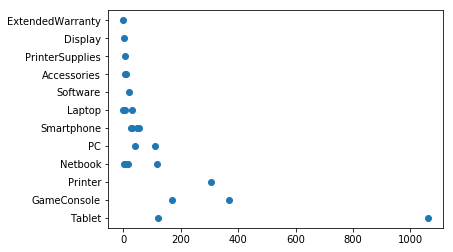

In [54]:
plt.scatter(sort_by_profit['Profit'], sort_by_profit['ProductType'])